In [1]:

#import libraries
import warnings
import pandas as  pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
warnings.filterwarnings('ignore')
import math


In [2]:
data = pd.read_csv(r'C:\Users\HP\Downloads\fyp\kidney_disease (2).csv')


In [3]:
data


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar',
              'red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood gulcose random',
              'blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume'
              ,'white_blood_cell_count','red_blood_cell_count','hypertension',
              'diabetesmellitus','coronary_artery_disease','appetite','pedal_edema',
              'anemia','class']


In [7]:
data.head(10)


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood gulcose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
data.isnull().any()


id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood gulcose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [10]:
data.drop('id',axis=1,inplace=True)


In [11]:
data.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#Handling missing values


In [12]:
data['blood gulcose random'].fillna(data['blood gulcose random'].mean(),inplace=True)


In [13]:
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)


In [14]:
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)


In [15]:
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)


In [16]:
data['packed_cell_volume']  = pd.to_numeric(data['packed_cell_volume'],errors='coerce')


In [17]:
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)


In [19]:
data['potassium'].fillna(data['potassium'].mean(),inplace=True)


# converting an object into float


In [20]:
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')


In [21]:
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)


In [22]:
data['serum_creatinine'] = pd.to_numeric(data['serum_creatinine'], errors='coerce')


In [23]:
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)


In [24]:
data['sodium'].fillna(data['sodium'].mean(),inplace=True)


In [25]:
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors = 'coerce')


In [26]:
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [27]:
data['age'].fillna(data['age'].mode()[0],inplace=True)


In [28]:
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)


In [29]:
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)


In [32]:
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)


In [33]:
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)


In [34]:
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)


In [219]:
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)


In [35]:
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)


In [36]:
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)


In [37]:
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)



In [38]:
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)


In [39]:
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)


In [40]:
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)


In [41]:
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [42]:
data.head(25)


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.000000,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38.000000,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.000000,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.000000,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.000000,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,NaN,normal,notpresent,notpresent,74.000000,...,39.000000,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.000000,...,36.000000,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.000000,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.000000,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.000000,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


#checking the null values


In [43]:
data.dtypes


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood gulcose random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetesmellitus            object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [44]:
data.isnull().sum()


age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood gulcose random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 0
diabetesmellitus             0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       1
class                        0
dtype: int64

#handling categorical values


In [45]:
catcols=set(data.dtypes [data.dtypes== 'O' ].index.values)
print(catcols)


{'bacteria', 'coronary_artery_disease', 'pus_cell_clumps', 'pedal_edema', 'red_blood_cells', 'appetite', 'anemia', 'pus_cell', 'diabetesmellitus', 'hypertension', 'class'}


In [47]:
catcols


{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells'}

In [48]:
for i in catcols:
  print("columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')


columns: bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

columns: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

columns: pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

columns: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

columns: appetite
Counter({'good': 318, 'poor': 82})
*

In [49]:
catcols = ['anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells']

In [50]:
from prompt_toolkit.shortcuts.progress_bar.formatters import Label
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("Label Encodings of :",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

Label Encodings of : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Counter({0: 339, 1: 60, 2: 1})
****************************************************************************************************
Label Encodings of : appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
Label Encodings of : bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
Label Encodings of : class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
Label Encodings of : coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
Counter({1: 364, 2: 34, 0: 2})
*********************************************************************************

In [51]:
data.dtypes


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood gulcose random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetesmellitus             int32
coronary_artery_disease      int32
appetite                     int32
pedal_edema                  int32
anemia                       int32
class                        int32
dtype: object

In [52]:
data.dtypes


age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int32
pus_cell                     int32
pus_cell_clumps              int32
bacteria                     int32
blood gulcose random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int32
diabetesmellitus             int32
coronary_artery_disease      int32
appetite                     int32
pedal_edema                  int32
anemia                       int32
class                        int32
dtype: object

In [53]:
contcols = set(data.dtypes[data.dtypes !='O'].index.values)
print(contcols)


{'sugar', 'bacteria', 'pus_cell_clumps', 'white_blood_cell_count', 'packed_cell_volume', 'red_blood_cell_count', 'albumin', 'red_blood_cells', 'sodium', 'hemoglobin', 'potassium', 'pedal_edema', 'serum_creatinine', 'blood gulcose random', 'diabetesmellitus', 'class', 'specific_gravity', 'blood_pressure', 'pus_cell', 'hypertension', 'blood_urea', 'coronary_artery_disease', 'appetite', 'anemia', 'age'}


In [54]:
for i in contcols:
  print("continous Columns:", i)
  print(c(data[i]))
  print('*'*120+'\n')


continous Columns: sugar
Counter({0.0: 339, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3})
************************************************************************************************************************

continous Columns: bacteria
Counter({0: 378, 1: 22})
************************************************************************************************************************

continous Columns: pus_cell_clumps
Counter({0: 358, 1: 42})
************************************************************************************************************************

continous Columns: white_blood_cell_count
Counter({8406.122448979591: 106, 9800.0: 11, 6700.0: 10, 9600.0: 9, 9200.0: 9, 7200.0: 9, 6900.0: 8, 11000.0: 8, 5800.0: 8, 7800.0: 7, 9100.0: 7, 9400.0: 7, 7000.0: 7, 4300.0: 6, 6300.0: 6, 10700.0: 6, 10500.0: 6, 7500.0: 5, 6200.0: 5, 8300.0: 5, 7900.0: 5, 8600.0: 5, 5600.0: 5, 10200.0: 5, 5000.0: 5, 8100.0: 5, 9500.0: 5, 6000.0: 4, 8400.0: 4, 10300.0: 4, 7700.0: 4, 5500.0: 4, 10400.0: 

In [55]:
contcols.remove('albumin')
contcols.remove('sugar')
contcols.remove('specific_gravity')
contcols


{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood gulcose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'white_blood_cell_count'}

In [56]:
catcols.append('specific_gravity')
catcols.append('sugar')
catcols.append('albumin')
catcols


['anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'specific_gravity',
 'sugar',
 'albumin']

In [57]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'bacteria', 'pus_cell_clumps', 'white_blood_cell_count', 'packed_cell_volume', 'red_blood_cell_count', 'red_blood_cells', 'sodium', 'hemoglobin', 'potassium', 'pedal_edema', 'serum_creatinine', 'blood gulcose random', 'diabetesmellitus', 'class', 'blood_pressure', 'pus_cell', 'hypertension', 'blood_urea', 'coronary_artery_disease', 'appetite', 'anemia', 'age'}


In [59]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('tno','no')


In [60]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tno','no')


In [61]:
data['diabetesmellitus'] = data.diabetesmellitus.replace('\tyes','yes')



In [62]:
c(data['coronary_artery_disease'])


Counter({1: 364, 2: 34, 0: 2})

In [63]:
c(data['diabetesmellitus'])


Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

#describe used to find mean, mode, etc.


In [64]:
data.describe()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood gulcose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,1.262500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.15500,0.755000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.655491,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.36921,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.00000,2.000000


<Axes: xlabel='age', ylabel='Density'>

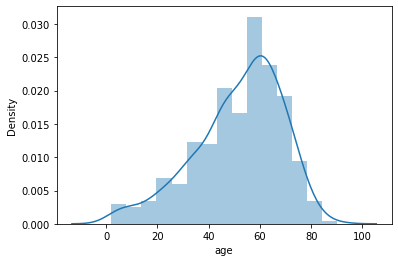

In [67]:
sns.distplot(data.age)


#BIVARIATE ANALYSIS


Text(0.5, 1.0, 'age vs Blood_pressure')

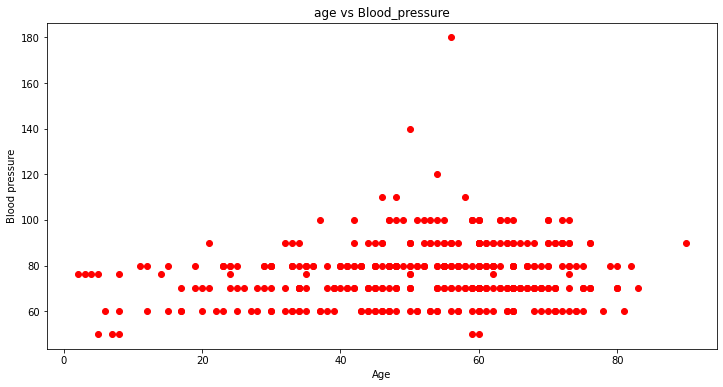

In [68]:
fig=plt.figure(figsize =(12,6))
plt.scatter(data['age'],data['blood_pressure'],color='r')
plt.xlabel('Age')
plt.ylabel('Blood pressure')
plt.title("age vs Blood_pressure")


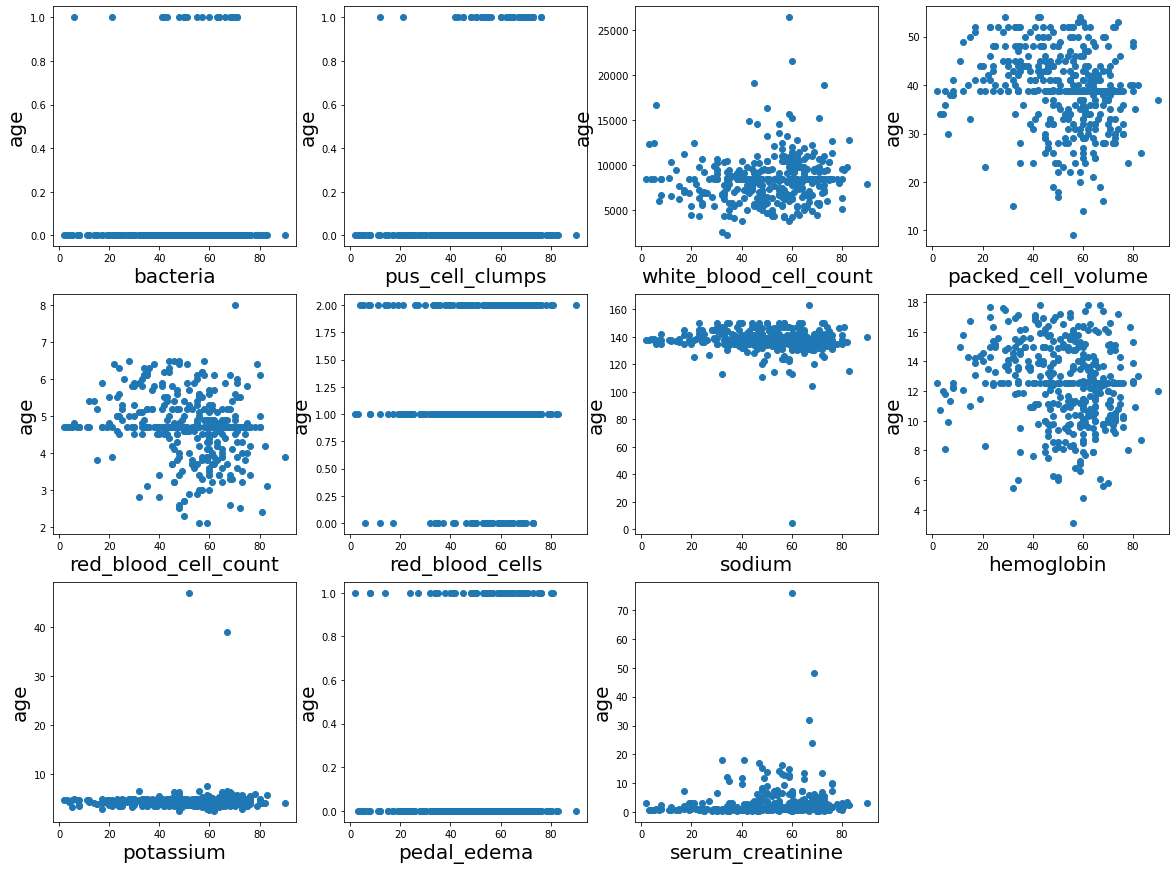

In [69]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('age',fontsize=20)
  plotnumber+=1
plt.show()

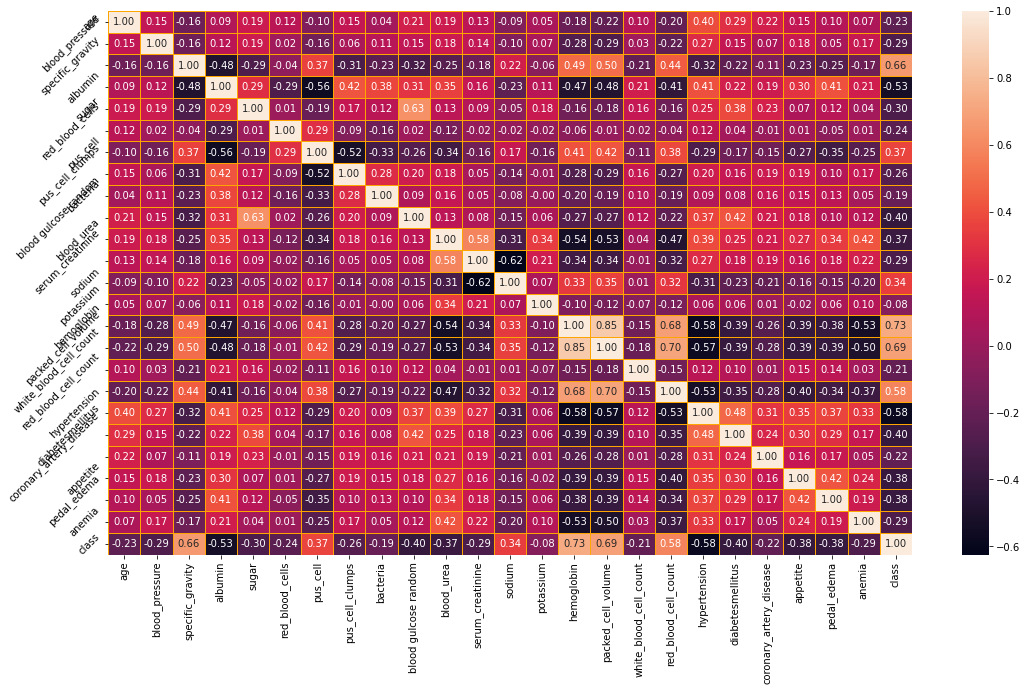

In [70]:
f,ax =plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()


<Axes: ylabel='count'>

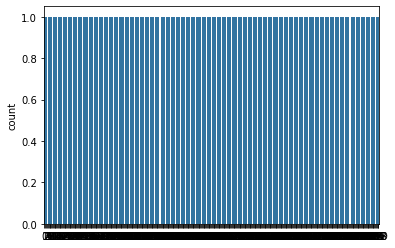

In [71]:
sns.countplot(data['class'])


In [72]:
selcols = ['red_blood_cells','pus_cell','blood gulcose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x= pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


#ANN model


In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [75]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [76]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [77]:
classification.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])



In [78]:
import sklearn.metrics


In [79]:
classification.fit(x_train,y_train,batch_size = 10,validation_split=0.2,epochs=100)


Epoch 1/100


26/26 [==============================] - 8s 31ms/step - loss: 0.9285 - accuracy: 0.2734 - val_loss: 1.0804 - val_accuracy: 0.1875
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.3008 - val_loss: 0.6948 - val_accuracy: 0.1562
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 0.8993 - accuracy: 0.2344 - val_loss: 0.9682 - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 0.7428 - accuracy: 0.2539 - val_loss: 0.6797 - val_accuracy: 0.1562
Epoch 5/100
26/26 [==============================] - 0s 10ms/step - loss: 0.5237 - accuracy: 0.2422 - val_loss: 0.4110 - val_accuracy: 0.2344
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.4111 - accuracy: 0.2266 - val_loss: 0.4761 - val_accuracy: 0.2500
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.4462 - accuracy: 0.2305 - val_loss: 0.3136 - val_accuracy: 0.3906
Epoch 8/

KeyboardInterrupt: 

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')


In [81]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [82]:
y_predict = rfc.predict(x_test)


In [83]:
y_predict_train = rfc.predict(x_test)


In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter = 'best',criterion='entropy')



In [85]:
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [86]:
y_predict = dtc.predict(x_test)
y_predict


array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2])

In [87]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)


LogisticRegression()

In [88]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)


#logistic regression


In [89]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


array([2])

In [90]:
#decision tree classifier
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)


[2]


array([2])

In [91]:
#randomforest classifier
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)


[2]


array([2])

In [92]:
classification.save("ckd.h5")


In [93]:
y_pred


array([2])

In [94]:
y_pred = (y_pred >0.5)
y_pred


array([ True])

In [95]:
def predict_exit(sample_value):

  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classification

In [96]:
test = classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('prediction: High chance of CKD!')
else:
  print('predication: LOW CHANCE OF CDK!')



1/1 [==============================] - 2s 2s/step
prediction: High chance of CKD!


In [97]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [98]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Create a new RandomForestClassifier object
clf = RandomForestClassifier()

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
from sklearn import model_selection
dfs =[]
models=[
    ('LogReg',LogisticRegression()),
    ('RF',RandomForestClassifier()),
    ('DecisionTree',DecisionTreeClassifier())
      ]

results=[]
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','','CKD']
for name, model in models:
     kfold = model_selection.KFold(n_splits=5,shuffle = True,random_state=90210)
     cv_results= model_selection.cross_validate(model,x_train,y_train,cv = kfold,scoring=scoring)
     clf = model.fit(x_train,y_train)
     y_pred = clf.predict(x_test)
     print(name)
     print(classification_report(y_test,y_pred,target_names=target_names))
     results.append(cv_results)
     this_df =pd.DataFrame(cv_results)
     this_df['model'] = name
     dfs.append(this_df)
     final = pd.concat(dfs,ignore_index=True)

#return final

LogReg
              precision    recall  f1-score   support

      NO CKD       0.96      0.92      0.94        53
                   0.00      0.00      0.00         1
         CKD       0.86      0.96      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.63      0.62        80
weighted avg       0.92      0.93      0.92        80

RF
              precision    recall  f1-score   support

      NO CKD       0.95      0.98      0.96        53
                   0.00      0.00      0.00         1
         CKD       0.96      0.92      0.94        26

    accuracy                           0.95        80
   macro avg       0.64      0.63      0.63        80
weighted avg       0.94      0.95      0.94        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.92      0.92      0.92        53
                   0.00      0.00      0.00         1
         CKD       0.85      0.88      0.87        2

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm


array([[49,  0,  4],
       [ 1,  0,  0],
       [ 1,  0, 25]], dtype=int64)

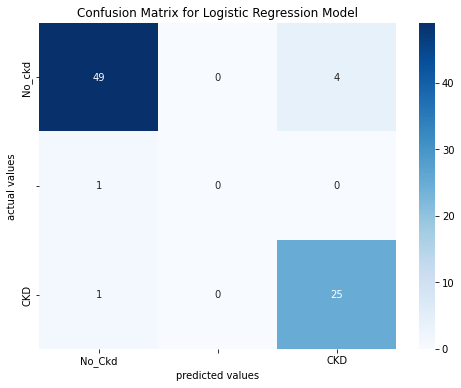

In [107]:
plt.figure(figsize =(8,6))
sns.heatmap(cm, cmap = 'Blues', annot=True,xticklabels =['No_Ckd','','CKD'],yticklabels=['No_ckd','','CKD'])
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


In [108]:
final = 1

In [118]:
model

1

In [130]:
bootstraps = []

for model  in list(set(final.model.values)):
    model_df =  final.loc[final.model == 1]
    bootstrap = model_df.sample(n=30, replace = True)
    bootstraps.append(bootstrap)

bootstrap_df =pd.concat(bootstraps,ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name = 'metrics',value_name='values')
time_metrics = ['fit_time','score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by = 'values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by= 'values')

AttributeError: 'int' object has no attribute 'model'

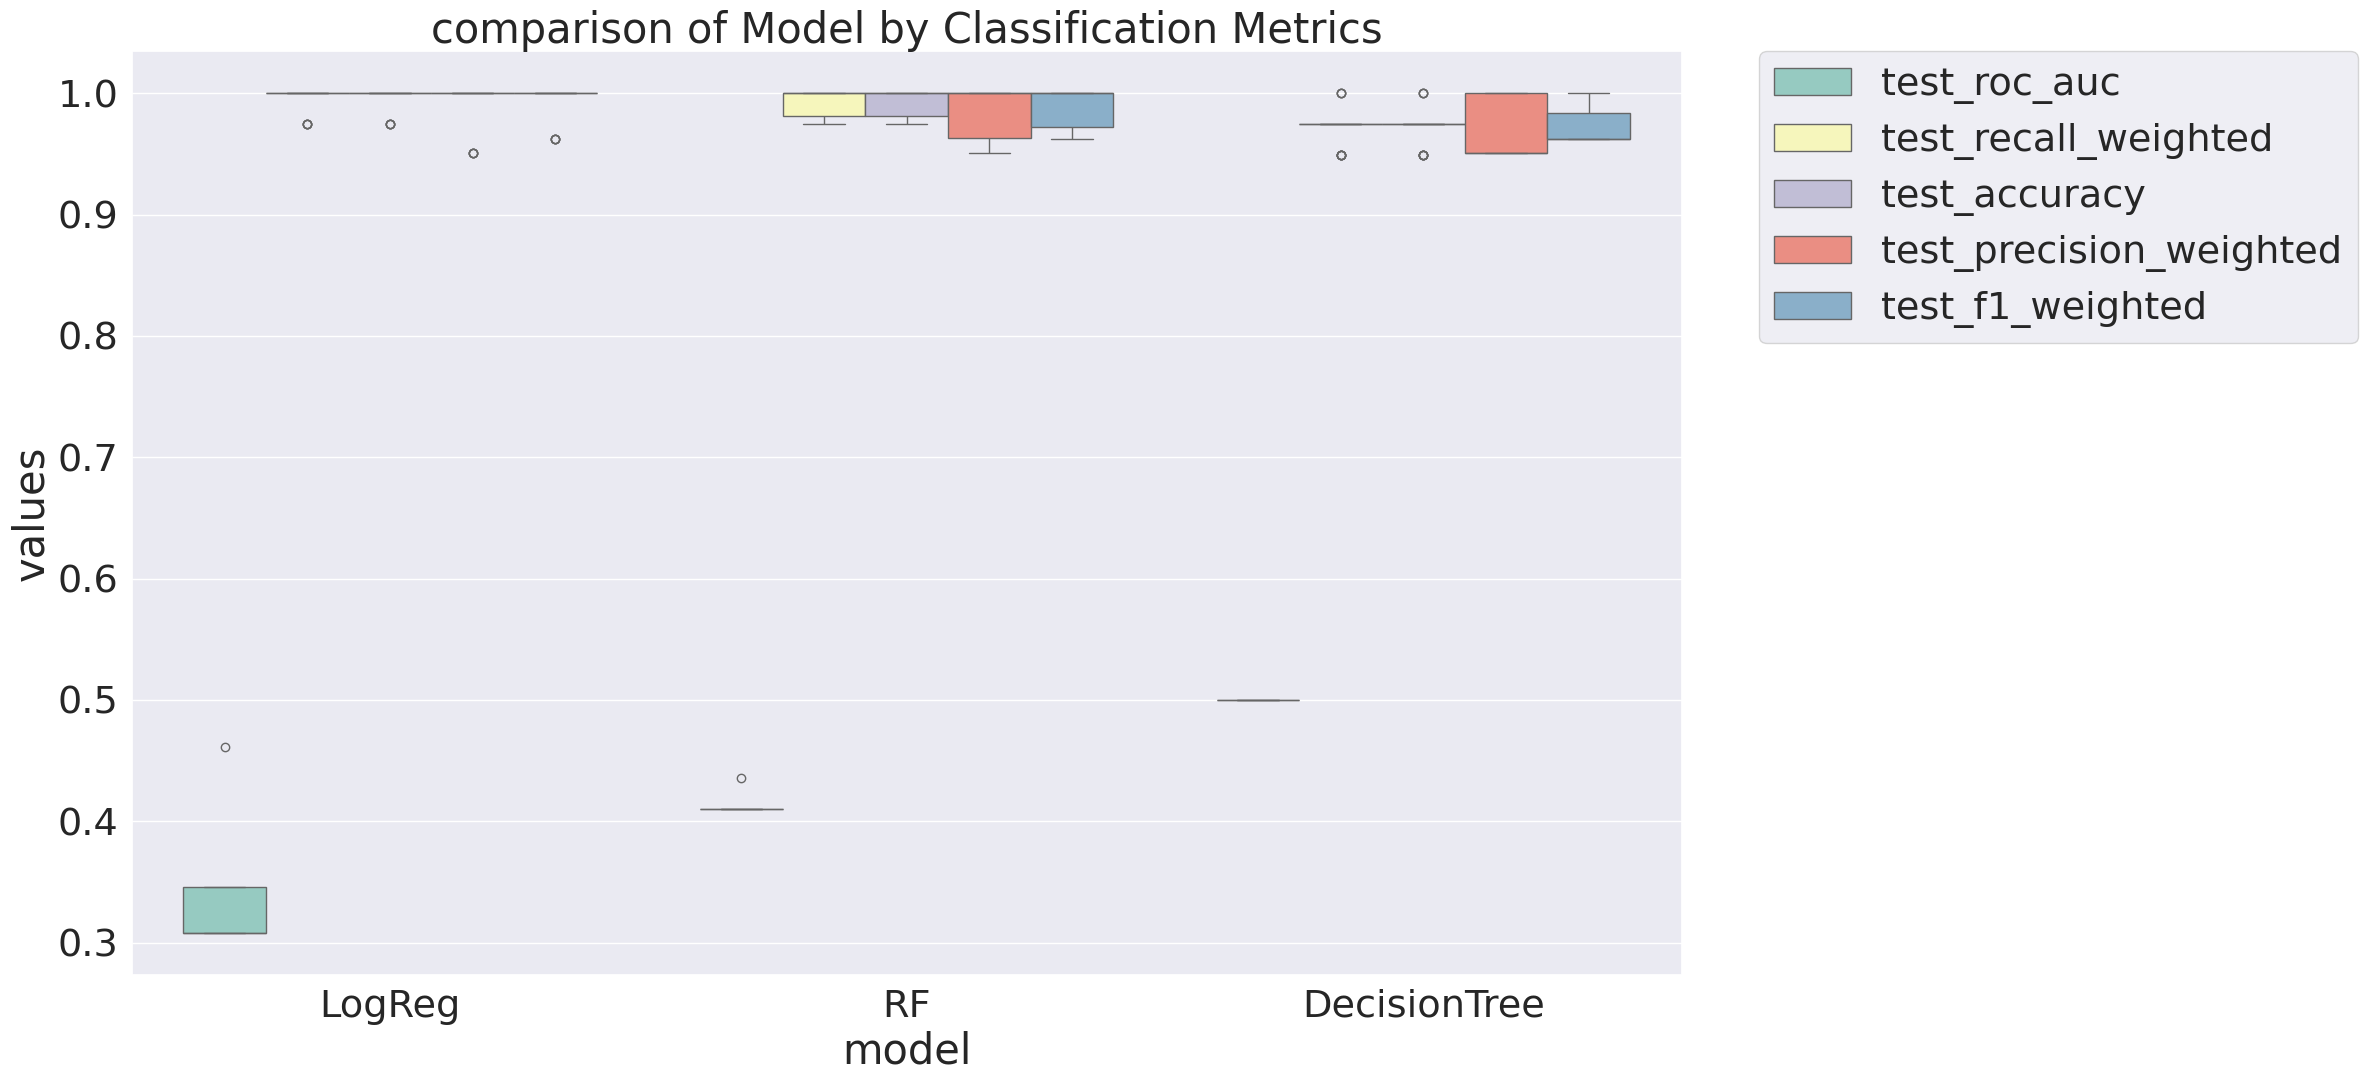

In [294]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x ="model",y="values",hue="metrics",data = results_long_nofit,palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.title('comparison of Model by Classification Metrics')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [295]:
import pickle
pickle.dump(lgr, open('CKD.pkl','wb'))


In [296]:
data.to_csv('naan02.csv',index=False)
